### IMPORT NECESSARY LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### LOAD THE DATASET

In [2]:
df=pd.read_csv(r'Rainfall_Dataset.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### ANALYSE THE DATA

In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.shape

(145460, 23)

### HANDLE MISSING VALUES

In [6]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

In [7]:
df['MinTemp'].fillna(df['MinTemp'].mean(),inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(),inplace=True)
df[ "Evaporation"].fillna(df["Evaporation"].mean(),inplace=True)
df[ "Sunshine"].fillna(df["Sunshine"].mean(),inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(),inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(),inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(),inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(),inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(),inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(),inplace=True)
df[ "Cloud9am"].fillna(df["Cloud9am"].mean(),inplace=True)
df[ "Cloud3pm"].fillna(df["Cloud3pm"].mean(),inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(),inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(),inplace=True)

In [8]:
print("Unique values in WindGustDir:",df.WindGustDir.unique())
print("Unique values in WindDir9am:",df.WindDir9am.unique())
print("Unique values in WindDir3pm:",df.WindDir3pm.unique())
print("Unique values in RainToday:",df.RainToday.unique())
print("Unique values in RainTomorrow:",df.RainTomorrow.unique())

Unique values in WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
Unique values in WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
Unique values in WindDir3pm: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
Unique values in RainToday: ['No' 'Yes' nan]
Unique values in RainTomorrow: ['No' 'Yes' nan]


In [9]:
df["WindGustDir"].fillna(df["WindGustDir"].mode()[0],inplace=True)
df["WindDir9am"].fillna(df["WindDir9am"].mode()[0],inplace=True)
df["WindDir3pm"].fillna(df["WindDir3pm"].mode()[0],inplace=True)
df["Pressure3pm"].fillna(df["Pressure3pm"].mode()[0],inplace=True)
df["RainToday"].fillna(df["RainToday"].mode()[0],inplace=True)
df["RainTomorrow"].fillna(df["RainTomorrow"].mode()[0],inplace=True)

In [10]:
df.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [12]:
X = df.iloc[:, :-2].values
print(X)

[['2008-12-01' 'Albury' 13.4 ... 4.509930082924903 16.9 21.8]
 ['2008-12-02' 'Albury' 7.4 ... 4.509930082924903 17.2 24.3]
 ['2008-12-03' 'Albury' 12.9 ... 2.0 21.0 23.2]
 ...
 ['2017-06-23' 'Uluru' 5.4 ... 4.509930082924903 12.5 26.1]
 ['2017-06-24' 'Uluru' 7.8 ... 2.0 15.1 26.0]
 ['2017-06-25' 'Uluru' 14.9 ... 8.0 15.0 20.9]]


In [13]:
Y = df.iloc[:, -2].values
print(Y)

['No' 'No' 'No' ... 'No' 'No' 'No']


### DATA VISUALIZATION

<AxesSubplot:ylabel='RainTomorrow'>

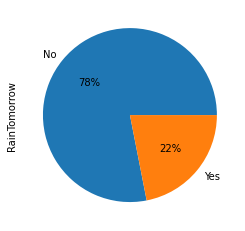

In [14]:
df['RainTomorrow'].value_counts().plot(kind='pie',autopct='%1.0f%%')

In [15]:
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})
df_rain_by_loc = df.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,689
Albany,902
Albury,617
AliceSprings,244
BadgerysCreek,583


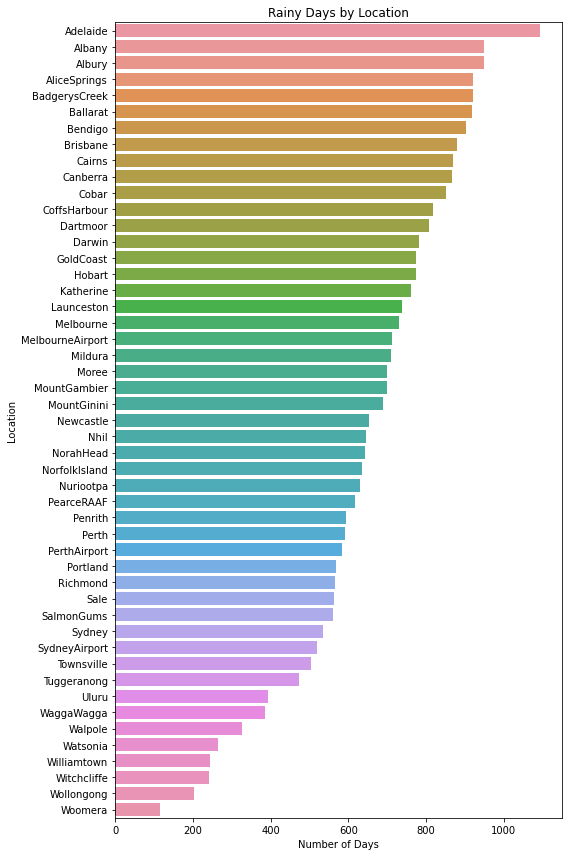

In [16]:
plt.figure(figsize=(8, 12))
sns.barplot(x='RainToday', 
            y=df_rain_by_loc.index, 
            data=df_rain_by_loc.sort_values('RainToday', ascending=False), 
            orient='h'
           )
plt.xlabel('Number of Days')
plt.title('Rainy Days by Location')
plt.tight_layout()

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

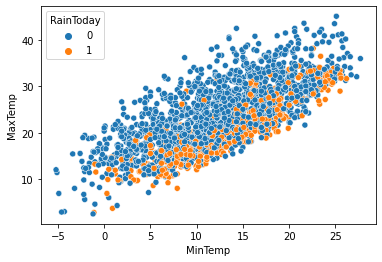

In [17]:
sns.scatterplot(data=df.sample(2000), x="MinTemp", y="MaxTemp",hue="RainToday")

<AxesSubplot:xlabel='Temp3pm', ylabel='Humidity3pm'>

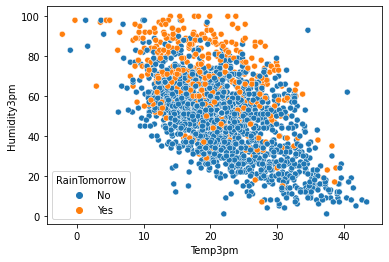

In [18]:

sns.scatterplot(data=df.sample(2000), x="Temp3pm", y="Humidity3pm",hue="RainTomorrow")

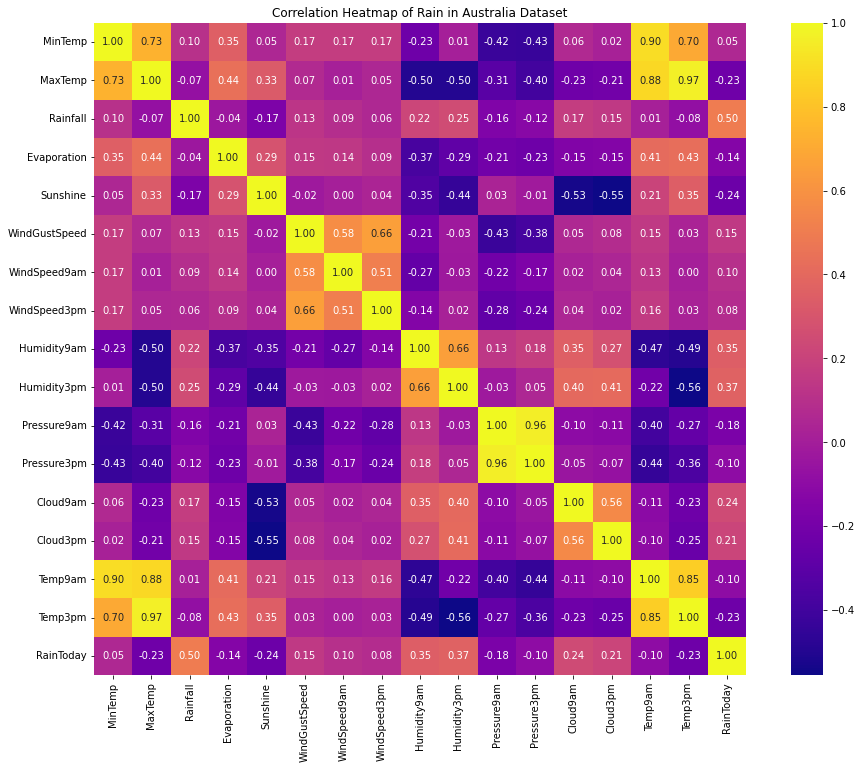

In [19]:
corrmat = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, square=True, annot=True, fmt='.2f', linecolor='white', cmap='plasma')    
plt.title('Correlation Heatmap of Rain in Australia Dataset')
plt.show()

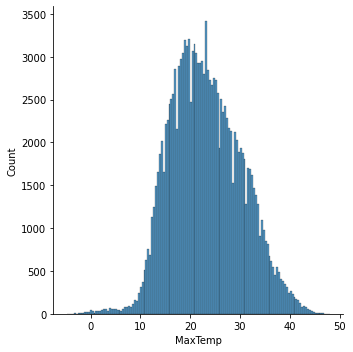

In [20]:
sns.displot(df["MaxTemp"])

<AxesSubplot:xlabel='RainTomorrow', ylabel='Count'>

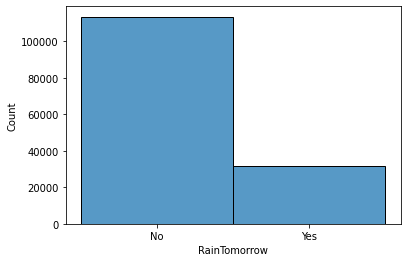

In [21]:
sns.histplot(df["RainTomorrow"])

<AxesSubplot:>

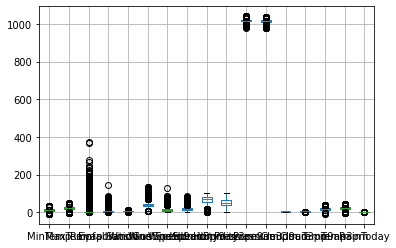

In [22]:
df.boxplot()

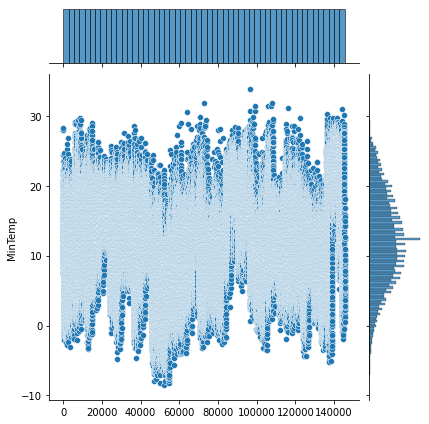

In [23]:
sns.jointplot(df["MinTemp"])

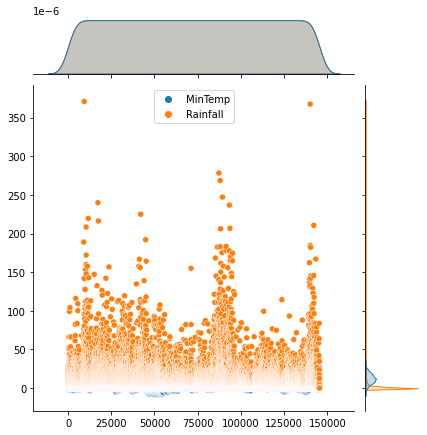

In [24]:
sns.jointplot((df["MinTemp"],df["Rainfall"]))

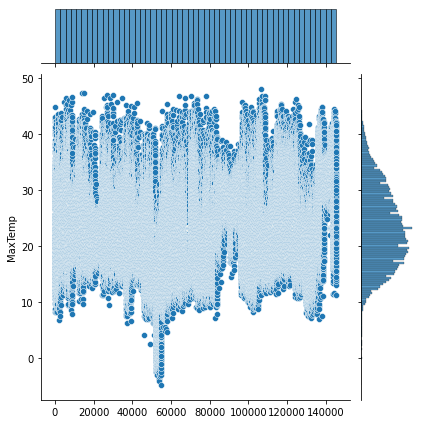

In [25]:
sns.jointplot(df["MaxTemp"]   )

<AxesSubplot:>

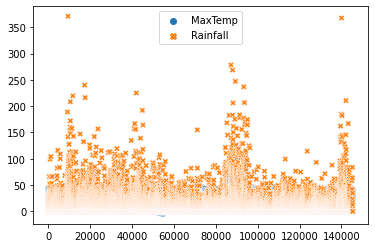

In [26]:
sns.scatterplot((df['MaxTemp'],df['Rainfall']))

### SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLE

In [27]:
X = df.drop(['Date','Location','WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], axis=1)
y = df['RainTomorrow']

### FEATURE SCALING

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
MinTemp,1.000000,0.733400,0.102706,0.351321,0.051297,0.172553,0.173404,0.173058,-0.230970,0.005995,-0.423584,-0.433390,0.062151,0.016722,0.897692,0.699211,0.054559
MaxTemp,0.733400,1.000000,-0.074040,0.438653,0.328931,0.065895,0.014294,0.049717,-0.497927,-0.498760,-0.308309,-0.396809,-0.225315,-0.212760,0.879170,0.968713,-0.225439
Rainfall,0.102706,-0.074040,1.000000,-0.037863,-0.170973,0.126446,0.085925,0.056527,0.221380,0.248905,-0.159055,-0.119536,0.171144,0.145343,0.011069,-0.077684,0.499899
Evaporation,0.351321,0.438653,-0.037863,1.000000,0.288169,0.147353,0.139968,0.094352,-0.373732,-0.286025,-0.210961,-0.230350,-0.150264,-0.145472,0.414592,0.425573,-0.139275
Sunshine,0.051297,0.328931,-0.170973,0.288169,1.000000,-0.023844,0.003843,0.037836,-0.348855,-0.443121,0.031406,-0.014822,-0.532497,-0.553853,0.208580,0.346685,-0.235296
WindGustSpeed,0.172553,0.065895,0.126446,0.147353,-0.023844,1.000000,0.577319,0.657243,-0.207964,-0.025355,-0.425760,-0.383978,0.052417,0.079927,0.145904,0.031884,0.145700
WindSpeed9am,0.173404,0.014294,0.085925,0.139968,0.003843,0.577319,1.000000,0.512427,-0.268271,-0.030887,-0.215339,-0.165586,0.019714,0.041667,0.127592,0.004476,0.098636
WindSpeed3pm,0.173058,0.049717,0.056527,0.094352,0.037836,0.657243,0.512427,1.000000,-0.143458,0.016275,-0.277604,-0.239933,0.041611,0.019813,0.161060,0.027587,0.077076
Humidity9am,-0.230970,-0.497927,0.221380,-0.373732,-0.348855,-0.207964,-0.268271,-0.143458,1.000000,0.659072,0.131503,0.176132,0.353490,0.273314,-0.469641,-0.490709,0.347034
Humidity3pm,0.005995,-0.498760,0.248905,-0.286025,-0.443121,-0.025355,-0.030887,0.016275,0.659072,1.000000,-0.025848,0.048763,0.398762,0.406605,-0.216964,-0.555608,0.367937


In [30]:
X

array([[ 1.89446615e-01, -4.53363105e-02, -2.10071794e-01, ...,
        -8.48734694e-16, -1.40531282e-02,  1.70232282e-02],
       [-7.53100728e-01,  2.65043084e-01, -2.81649838e-01, ...,
        -8.48734694e-16,  3.24642790e-02,  3.81984952e-01],
       [ 1.10901003e-01,  3.49692009e-01, -2.81649838e-01, ...,
        -1.19923244e+00,  6.21684769e-01,  2.21401794e-01],
       ...,
       [-1.06728318e+00,  5.18989861e-01, -2.81649838e-01, ...,
        -8.48734694e-16, -6.96308433e-01,  6.44757393e-01],
       [-6.90264238e-01,  5.33098015e-01, -2.81649838e-01, ...,
        -1.19923244e+00, -2.93157571e-01,  6.30158924e-01],
       [ 4.25083451e-01, -5.01222327e-16, -2.81649838e-01, ...,
         1.66753850e+00, -3.08663373e-01, -1.14362992e-01]])

### SPLIT THE DATA INTO TRAIN AND TEST SETS

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### CREATE THE MODELS

In [32]:
rfc = RandomForestClassifier()
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=3000)
kn = KNeighborsClassifier(n_neighbors=3)
dt = tree.DecisionTreeClassifier()

### FIT THE MODELS

In [33]:
rfc.fit(X_train,y_train)
lr.fit(X_train,y_train)
kn.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### EVALUATE THE MODELS

In [34]:
y_pred_rfc = rfc.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_kn = kn.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [35]:
print("--MODEL ACCURACY--")
print("Random Forest:", rfc.score(X_test, y_test)*100)
print("Logistic Regression:", lr.score(X_test, y_test)*100)
print("K-Nearest Neighbors:", kn.score(X_test, y_test)*100)
print("Decision Tree:", dt.score(X_test, y_test)*100)

--MODEL ACCURACY--
Random Forest: 85.14024474082223
Logistic Regression: 78.46830743847106
K-Nearest Neighbors: 82.32503781108208
Decision Tree: 77.74302213666986


In [36]:
print("--CLASSIFICATION REPORTS--")
print("Random Forest:")
print(classification_report(y_test, y_pred_rfc))
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("\nK-Nearest Neighbors:")
print(classification_report(y_test, y_pred_kn))
print("\nDecision Tree:")
print(classification_report(y_test, y_pred_dt))

--CLASSIFICATION REPORTS--
Random Forest:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22633
         Yes       0.75      0.50      0.60      6459

    accuracy                           0.85     29092
   macro avg       0.81      0.73      0.75     29092
weighted avg       0.84      0.85      0.84     29092


Logistic Regression:
              precision    recall  f1-score   support

          No       0.92      0.79      0.85     22633
         Yes       0.51      0.76      0.61      6459

    accuracy                           0.78     29092
   macro avg       0.72      0.78      0.73     29092
weighted avg       0.83      0.78      0.80     29092


K-Nearest Neighbors:
              precision    recall  f1-score   support

          No       0.86      0.92      0.89     22633
         Yes       0.63      0.49      0.55      6459

    accuracy                           0.82     29092
   macro avg       0.75      0.71      0.7

In [38]:
model = RandomForestClassifier()

In [39]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
y_pred = model.predict(X_test)

In [41]:
print("Accuracy:", model.score(X_test, y_test)*100)

Accuracy: 85.17461845180806


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22633
         Yes       0.75      0.50      0.60      6459

    accuracy                           0.85     29092
   macro avg       0.81      0.73      0.76     29092
weighted avg       0.84      0.85      0.84     29092



### SAVE THE MODELS

In [43]:
pickle.dump(rfc, open('RandomForestClassifier.pkl','wb'))
pickle.dump(lr, open('LogisticRegression.pkl','wb'))
pickle.dump(kn, open('KNN.pkl','wb'))
pickle.dump(dt, open('DecisionTree.pkl','wb'))
pickle.dump(scaler,open('scale.pkl','wb'))